In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

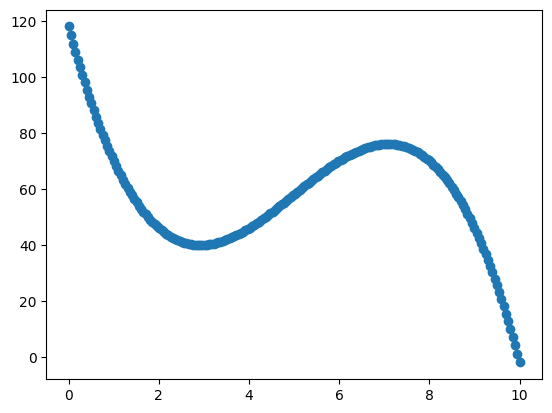

In [2]:

base_polynomial = np.polynomial.polynomial.Polynomial.fromroots((1, 6 ,8))

x , y = base_polynomial.linspace(n=200, domain=(0, 10))

y = -y + 70

plt.scatter(x,y)

Now add random data on top


(200,)
(200,)


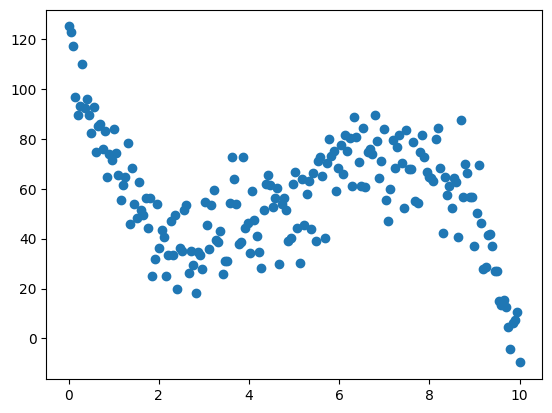

In [3]:
y += 12 * np.random.randn(y.size)

# replace x with integer values

x = np.linspace(0, 10, 200)

plt.scatter(x, y)
print(x.shape)
print(y.shape)

In [4]:
d = {"x": x, "y": y}
df = pd.DataFrame(data=d)
df.head()

,x,y
0,0.000000,125.005470
1,0.050251,122.986354
2,0.100503,117.368243
3,0.150754,96.933110
4,0.201005,89.620995


Now try to fit a model to this df

In [5]:
x = df[["x"]].values

#normalise x

x = (x-np.mean(x)) / np.std(x)

y = df["y"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=22)

In [6]:
x_poly_train = PolynomialFeatures(degree=3,).fit_transform(x_train)

x_poly_test = PolynomialFeatures(degree=3).fit_transform(x_test)

polymodel = LinearRegression()

polymodel.fit(x_poly_train, y_train)

# print(x_poly_train)
print(polymodel.coef_)
print(x_train.shape)
print(x_poly_train)

y_poly_pred = polymodel.predict(x_poly_test)

x_train

[  0.          36.84408909   0.56010945 -23.86711571]
(180, 1)
[[ 1.00000000e+00  1.63680847e+00  2.67914198e+00  4.38524229e+00]
 [ 1.00000000e+00 -1.29905434e-01  1.68754219e-02 -2.19220901e-03]
 [ 1.00000000e+00  7.36130795e-01  5.41888547e-01  3.98900847e-01]
 [ 1.00000000e+00  1.04790384e+00  1.09810245e+00  1.15070577e+00]
 [ 1.00000000e+00 -8.57375867e-01  7.35093377e-01 -6.30251322e-01]
 [ 1.00000000e+00  1.72341210e+00  2.97014925e+00  5.11879115e+00]
 [ 1.00000000e+00 -4.58999202e-01  2.10680267e-01 -9.67020743e-02]
 [ 1.00000000e+00  1.15182818e+00  1.32670817e+00  1.52813986e+00]
 [ 1.00000000e+00 -1.01326239e+00  1.02670067e+00 -1.04031717e+00]
 [ 1.00000000e+00 -1.20379036e+00  1.44911123e+00 -1.74442612e+00]
 [ 1.00000000e+00  1.06522456e+00  1.13470337e+00  1.20871390e+00]
 [ 1.00000000e+00 -1.67144992e+00  2.79374484e+00 -4.66960460e+00]
 [ 1.00000000e+00 -5.80244274e-01  3.36683417e-01 -1.95358625e-01]
 [ 1.00000000e+00  1.39431833e+00  1.94412360e+00  2.71072717e+00]

array([[ 1.63680847],
       [-0.12990543],
       [ 0.73613079],
       [ 1.04790384],
       [-0.85737587],
       [ 1.7234121 ],
       [-0.4589992 ],
       [ 1.15182818],
       [-1.01326239],
       [-1.20379036],
       [ 1.06522456],
       [-1.67144992],
       [-0.58024427],
       [ 1.39431833],
       [ 1.5848463 ],
       [-1.49824268],
       [-0.00866036],
       [ 0.92665877],
       [-1.61948775],
       [ 1.01326239],
       [-0.6668479 ],
       [ 0.89201732],
       [-1.18646963],
       [ 0.87469659],
       [ 0.84005514],
       [ 0.94397949],
       [-0.3897163 ],
       [ 0.33775413],
       [-1.29039398],
       [-0.97862094],
       [-0.30311268],
       [ 1.3769976 ],
       [-0.47631993],
       [-0.09526399],
       [ 1.27307326],
       [ 0.4589992 ],
       [ 1.25575253],
       [-1.55020485],
       [-1.23843181],
       [-1.30771471],
       [ 1.68877065],
       [-1.68877065],
       [-0.78809297],
       [ 0.3204334 ],
       [ 1.41163905],
       [-0

In [7]:
x_test[:,0]

array([ 0.77077224,  0.99594166, -1.16914891, -0.02598109,  1.09986601,
       -0.37239558, -0.14722616,  1.22111108,  0.42435775, -0.42435775,
        1.55020485,  1.32503543,  0.07794326, -1.3769976 , -0.21650906,
       -0.92665877,  0.49364065, -1.09986601,  0.61488572, -1.5155634 ])

In [8]:
# Helper code to visualise the results
idx = np.argsort(x_test[:,0])
x_test = x_test[idx]

# Use the above index to get the appropriate predicted values for y
# y values corresponding to sorted test data
y_test = y_test[idx]



# Non-linear predicted values
y_poly_pred= y_poly_pred[idx]

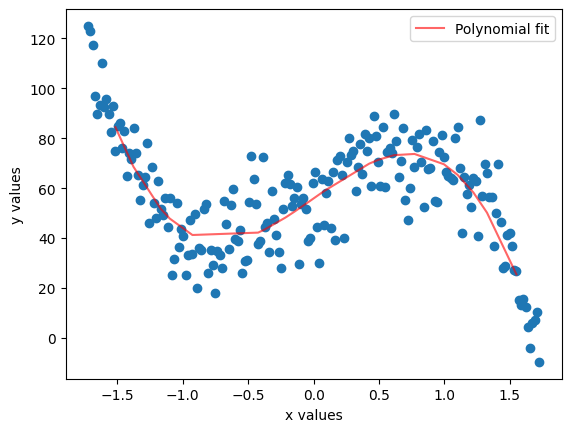

In [9]:
plt.scatter(x, y)

plt.plot(x_test, y_poly_pred, label="Polynomial fit",color='red', alpha=0.6)

plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()

In [10]:
poly_residuals = y_test - y_poly_pred

(array([0., 0., 1., 1., 1., 1., 0., 2., 0., 3., 2., 0., 2., 1., 1., 0., 2.,
        2., 1.]),
 array([-20.        , -17.89473684, -15.78947368, -13.68421053,
        -11.57894737,  -9.47368421,  -7.36842105,  -5.26315789,
         -3.15789474,  -1.05263158,   1.05263158,   3.15789474,
          5.26315789,   7.36842105,   9.47368421,  11.57894737,
         13.68421053,  15.78947368,  17.89473684,  20.        ]),
 <BarContainer object of 19 artists>)

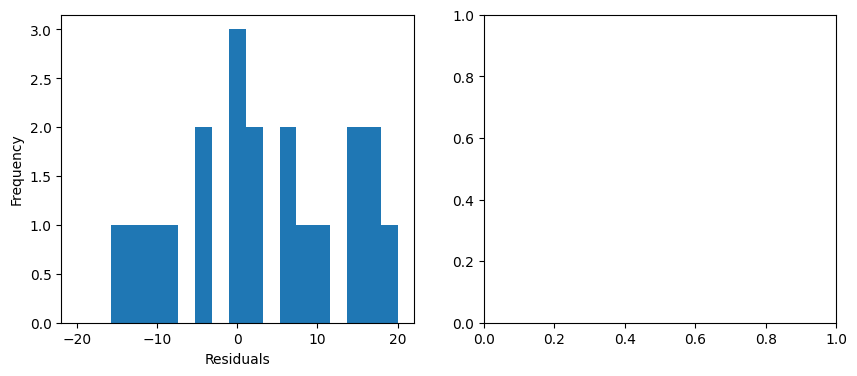

In [11]:
fig, ax = plt.subplots(1,2, figsize= (10,4))
bins = np.linspace(-20,20,20)

ax[0].set_xlabel("Residuals")
ax[0].set_ylabel("Frequency")

ax[0].hist(poly_residuals, bins)


In [12]:
MSE = mean_squared_error(y_test, y_poly_pred)

MSE

108.68076075983065

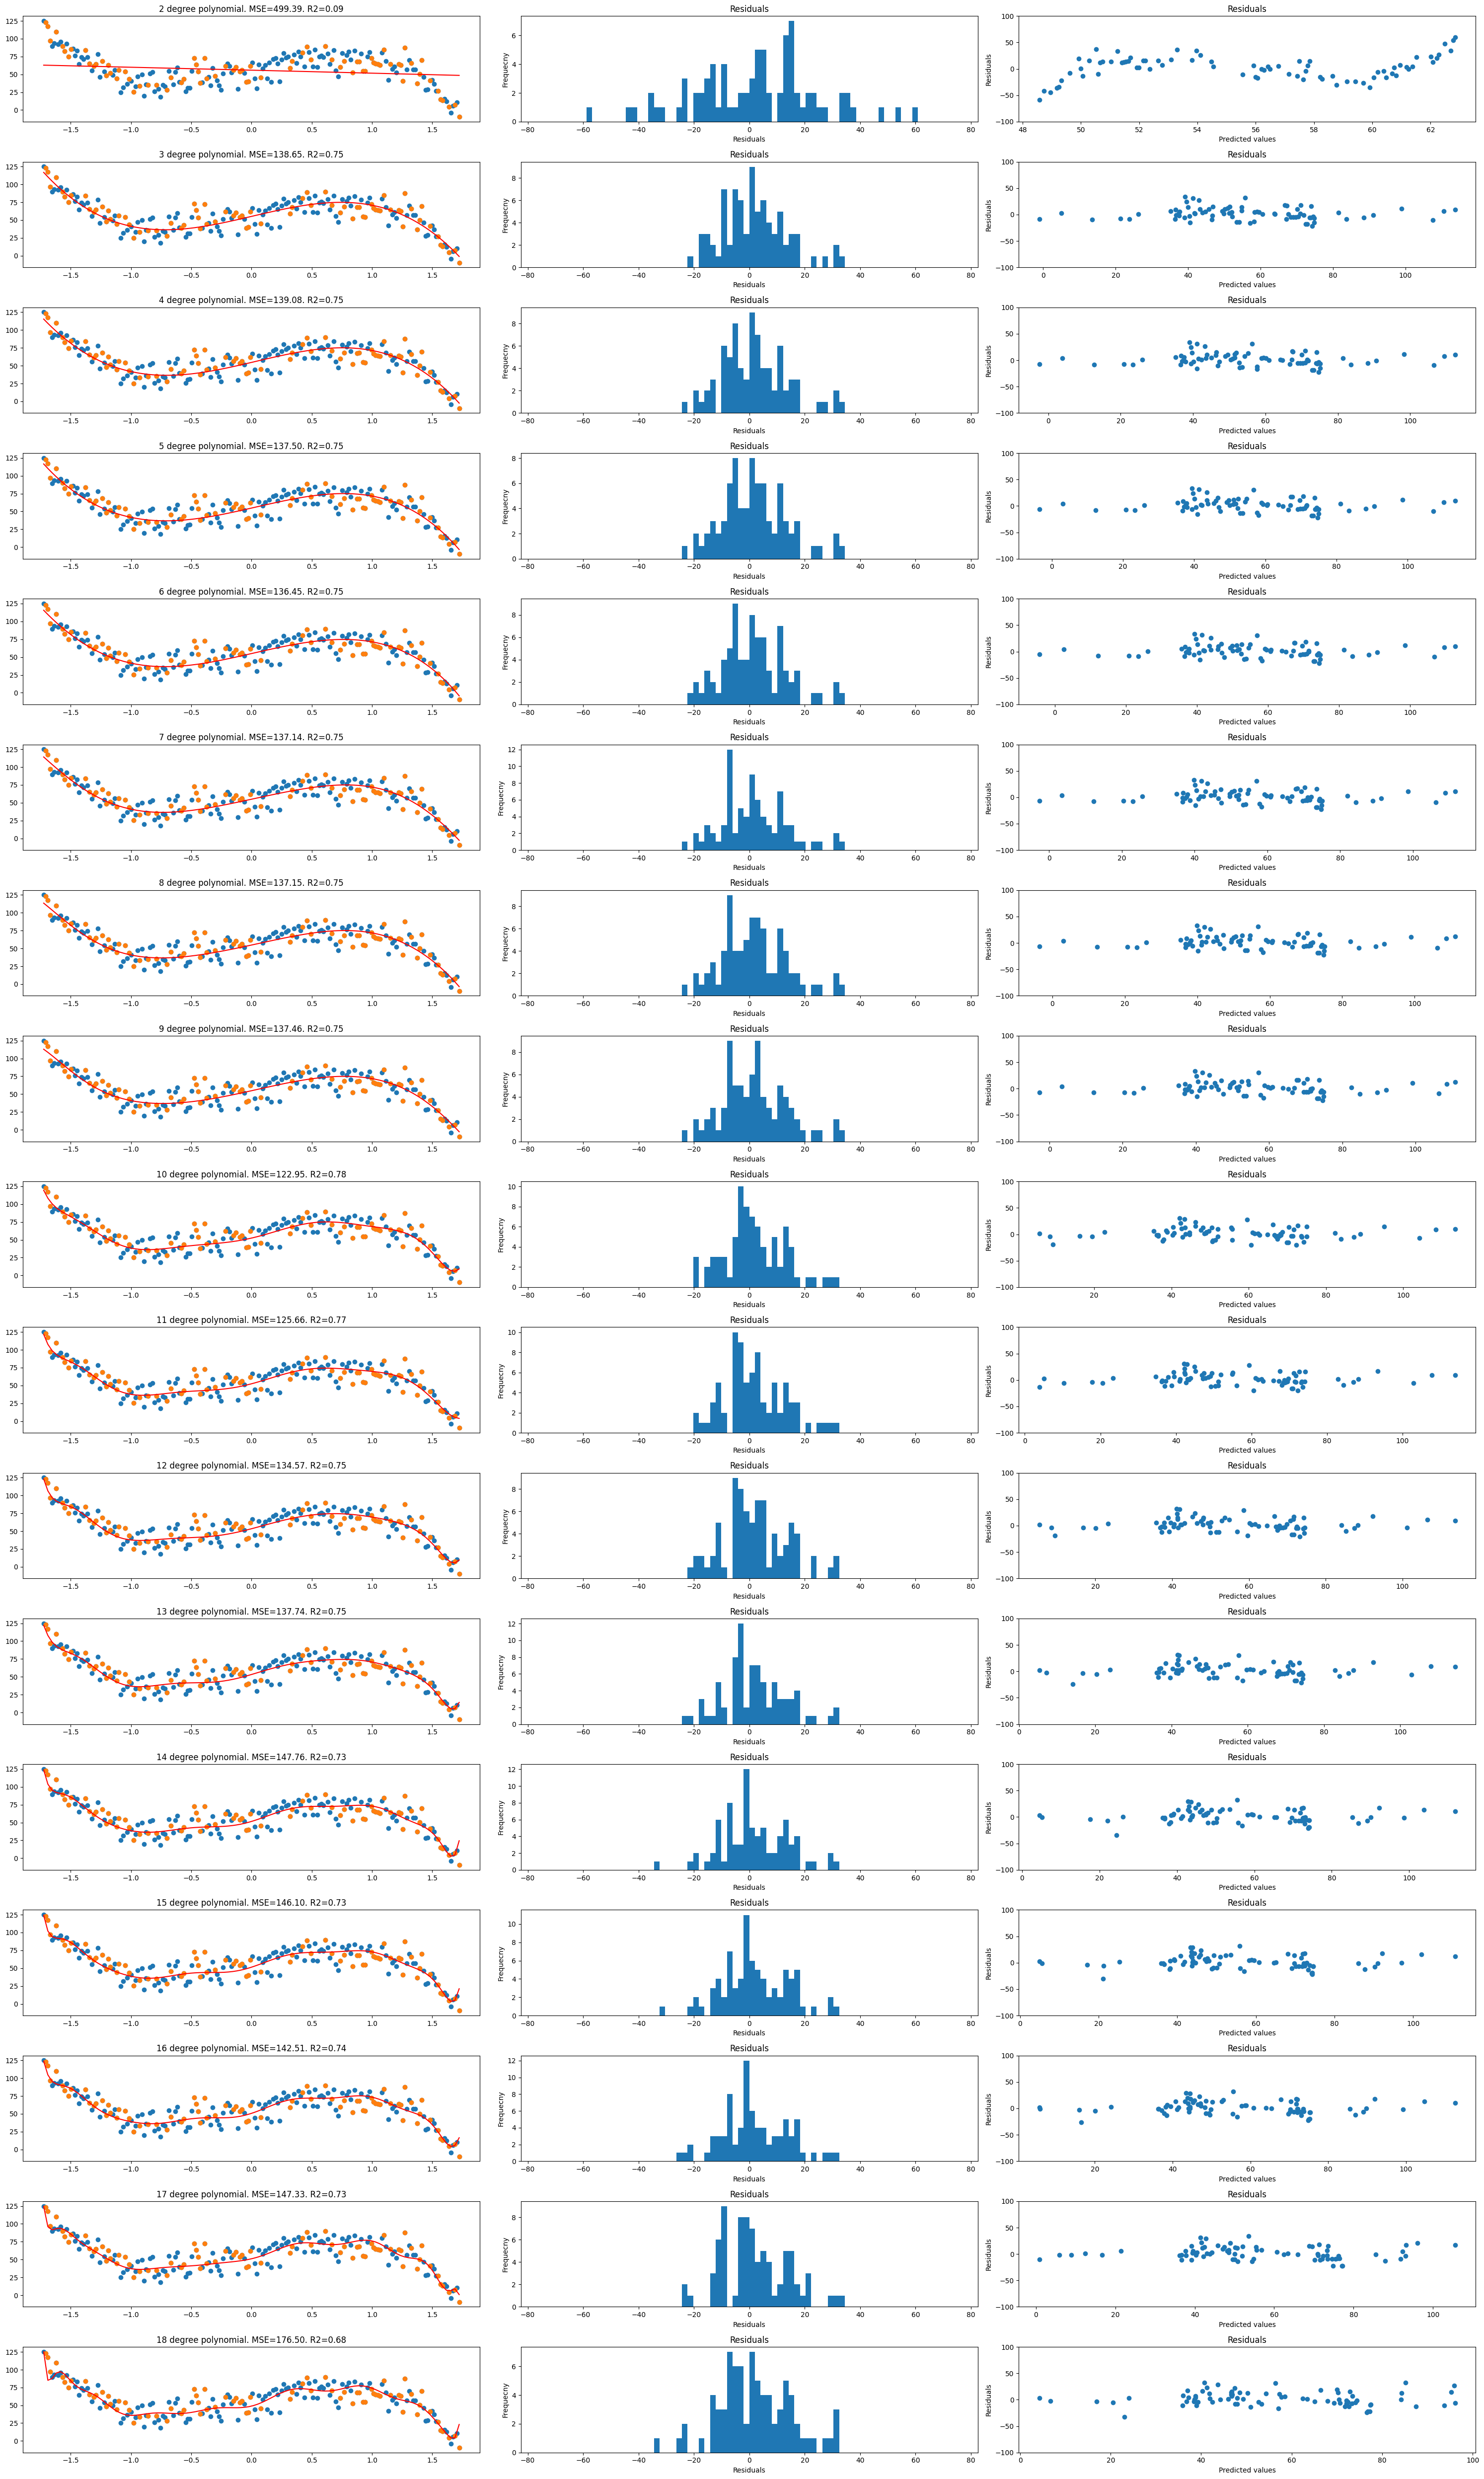

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.6, random_state=22)


degrees = [1,3,18]
degrees = range(2,19)


fig, ax = plt.subplots(int(len(degrees)/1), 3, figsize= (30,50))

ax.shape

bins = np.linspace(-75,75,75)

i=0

for row in range(ax.shape[0]):

    degree = degrees[i]

    x_poly_train = PolynomialFeatures(degree=degree).fit_transform(x_train)    
    x_poly_test = PolynomialFeatures(degree=degree).fit_transform(x_test)

    polymodel = LinearRegression(fit_intercept=False)
    polymodel.fit(x_poly_train, y_train)

    y_poly_pred = polymodel.predict(x_poly_test)

    idx = np.argsort(x_test[:,0])
    x_test = x_test[idx]
    y_test = y_test[idx]
    y_poly_pred = y_poly_pred[idx]

    MSE = mean_squared_error(y_test, y_poly_pred)
    r2 = r2_score(y_test, y_poly_pred)

    # using linspace to create smoother lines
    x_l = np.linspace(np.min(x), np.max(x), 100).reshape(-1, 1)
    x_poly_l = PolynomialFeatures(degree=degree).fit_transform(x_l)
    x_poly_pred_l = polymodel.predict(x_poly_l)

    # caluclate residuals
    residuals = y_test - y_poly_pred


    ax[row, 0].scatter(x,y)
    ax[row, 0].scatter(x_test,y_test)
    ax[row, 0].plot(x_l, x_poly_pred_l, color="red")
    ax[row, 0].set_title(f"{degree} degree polynomial. MSE={MSE:.2f}. R2={r2:.2f}")

    # residuals hist
    ax[row,1].hist(residuals, bins)
    ax[row,1].set_title("Residuals")
    ax[row,1].set_xlabel("Residuals")
    ax[row,1].set_ylabel("Frequecny")



    # residuals scatter
    ax[row, 2].scatter(y_poly_pred, residuals)
    ax[row, 2].set_title("Residuals")
    ax[row, 2].set_xlabel("Predicted values")
    ax[row, 2].set_ylabel("Residuals")
    ax[row, 2].set_ylim(-100,100)



    i+=1


fig.tight_layout()